# Advanced Topic Modeling: Part 2

In [1]:
from pathlib import Path

import dariah
import cophi

## Preprocessing a corpus

In [2]:
directory = Path("data", "british-fiction-corpus")

In [3]:
corpus, metadata = cophi.corpus(directory,
                                lemma=True,
                                pos=["NN"],
                                language="en",
                                metadata=True)

In [4]:
metadata.iloc[:5]

,filepath,parent,suffix,title,uuid
0,data/british-fiction-corpus/fielding_tom.txt,data/british-fiction-corpus,.txt,fielding_tom,4b0bd7aa-6da1-11e9-bdd2-7c7a9196f28f
1,data/british-fiction-corpus/thackeray_lyndon.txt,data/british-fiction-corpus,.txt,thackeray_lyndon,72052622-6da1-11e9-bdd2-7c7a9196f28f
2,data/british-fiction-corpus/fielding_joseph.txt,data/british-fiction-corpus,.txt,fielding_joseph,b1a7baa6-6da1-11e9-bdd2-7c7a9196f28f
3,data/british-fiction-corpus/dickens_bleak.txt,data/british-fiction-corpus,.txt,dickens_bleak,e1162c78-6da1-11e9-bdd2-7c7a9196f28f
4,data/british-fiction-corpus/thackeray_vanity.txt,data/british-fiction-corpus,.txt,thackeray_vanity,244ac148-6da2-11e9-bdd2-7c7a9196f28f


### Extending metadata

In [5]:
metadata["year"] = [1868, 1853, 1860, 1799, 1742, 1749, 1844, 1850, 1876, 1848]
metadata.iloc[:5]

,filepath,parent,suffix,title,uuid,year
0,data/british-fiction-corpus/fielding_tom.txt,data/british-fiction-corpus,.txt,fielding_tom,4b0bd7aa-6da1-11e9-bdd2-7c7a9196f28f,1868
1,data/british-fiction-corpus/thackeray_lyndon.txt,data/british-fiction-corpus,.txt,thackeray_lyndon,72052622-6da1-11e9-bdd2-7c7a9196f28f,1853
2,data/british-fiction-corpus/fielding_joseph.txt,data/british-fiction-corpus,.txt,fielding_joseph,b1a7baa6-6da1-11e9-bdd2-7c7a9196f28f,1860
3,data/british-fiction-corpus/dickens_bleak.txt,data/british-fiction-corpus,.txt,dickens_bleak,e1162c78-6da1-11e9-bdd2-7c7a9196f28f,1799
4,data/british-fiction-corpus/thackeray_vanity.txt,data/british-fiction-corpus,.txt,thackeray_vanity,244ac148-6da2-11e9-bdd2-7c7a9196f28f,1742


In [6]:
dtm = corpus.drop(corpus.dtm, corpus.hapax)

In [7]:
dtm = corpus.map_metadata(data=dtm,
                          metadata=metadata,
                          uuid="uuid",
                          fields=["year", "title"],
                          sep="_").fillna(0).astype(int)
dtm.iloc[:5,:10]

,chapter,century,morning,iron,gate,academy,lady,family,coach,horse
1868_fielding_tom,47,7,115,8,11,4,498,249,50,103
1853_thackeray_lyndon,47,7,115,8,11,4,498,249,50,103
1860_fielding_joseph,47,7,115,8,11,4,498,249,50,103
1799_dickens_bleak,47,7,115,8,11,4,498,249,50,103
1742_thackeray_vanity,47,7,115,8,11,4,498,249,50,103


## Training a model

In [8]:
model = dariah.core.LDA(num_topics=10,
                        num_iterations=1000,
                        mallet="mallet-2.0.8/bin/mallet")
model.fit(dtm)

In [9]:
model.topics.iloc[:, :5]

,word0,word1,word2,word3,word4
topic0,daughter,girl,news,look,week
topic1,way,son,friend,mother,day
topic2,part,country,family,officer,bed
topic3,night,days,marriage,person,brother
topic4,lady,heart,dinner,people,head
topic5,woman,gentleman,love,room,time
topic6,dear,child,family,wife,eyes
topic7,money,house,carriage,course,servant
topic8,place,gentleman,father,pleasure,company
topic9,day,house,friend,boy,letter


## Visualizing a model

In [10]:
vis = dariah.core.Vis(model)

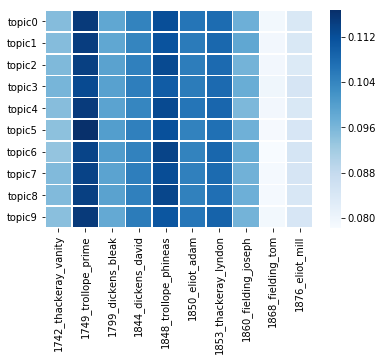

In [11]:
%matplotlib inline

vis.topic_document()